In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from icedef import constants, iceberg, metocean, drift, tools, simulator, test_case, plot

In [2]:
tc = test_case.TestCase()
start_latitude = tc.start_latitude
start_longitude = tc.start_longitude
start_velocity = tc.start_velocity
start_time = tc.start_time
end_time = tc.end_time
ref_times = tc.ref_times
ref_lons = tc.ref_lons
ref_lats = tc.ref_lats
start_location = (tc.start_latitude, tc.start_longitude)
time_frame = (tc.start_time, tc.end_time)
start_velocity = tc.start_velocity

# Sanity Check with Constant Current and/or Wind

## No Wind Constant Current of 0.1, 0.1

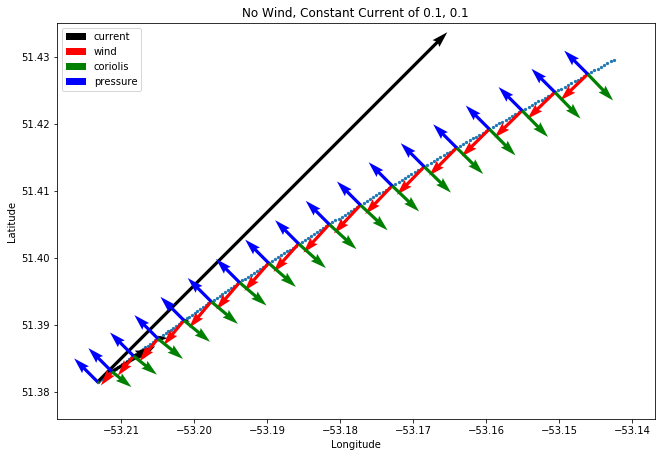

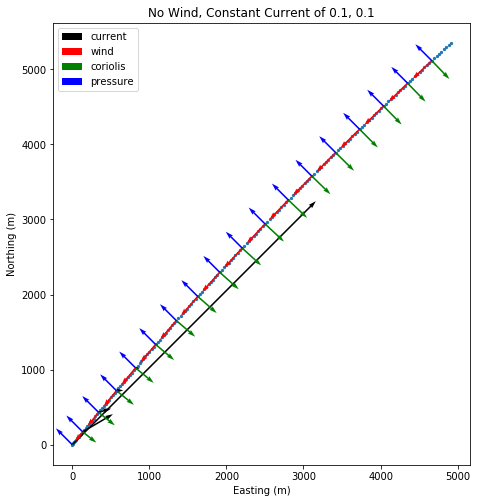

In [17]:
xds = simulator.run_test_simulation(start_location, time_frame, 
                                    constant_current_velocity=(0.1, 0.1),
                                    constant_wind_velocity=(0, 0),
                                    constant_current_acceleration=(0, 0),
                                    zero_current_force=False, 
                                    zero_wind_force=False, 
                                    zero_coriolis_force=False, 
                                    zero_pressure_force=False)


plot.plot_iceberg_track(xds['latitude'], xds['longitude'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='No Wind, Constant Current of 0.1, 0.1', 
                        filename='plots/deg_no_wind_constant_current', autoscale_figure=True,
                        figure_scale_factor=1.5)
                        #ref_track=(ref_lats, ref_lons))
    
plot.plot_iceberg_track(xds['northing'], xds['easting'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='No Wind, Constant Current of 0.1, 0.1', 
                        filename='plots/cart_no_wind_constant_current', autoscale_figure=True,
                        figure_scale_factor=1.3, xlabel='Easting (m)', ylabel='Northing (m)')



## No Wind Constant Current of 0.1, 0

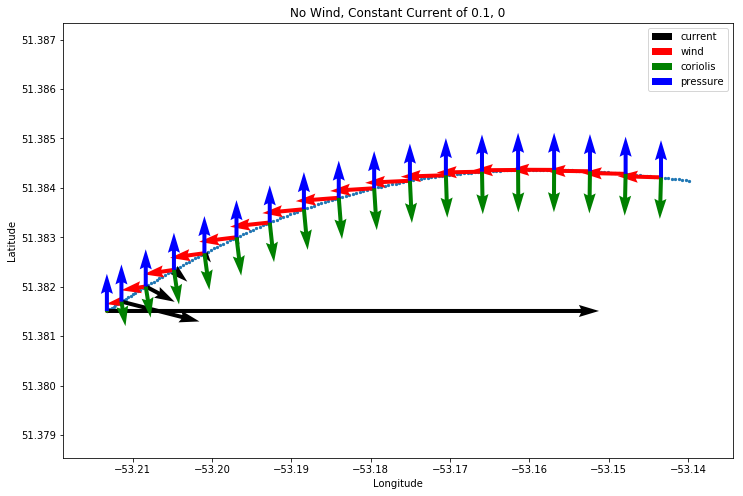

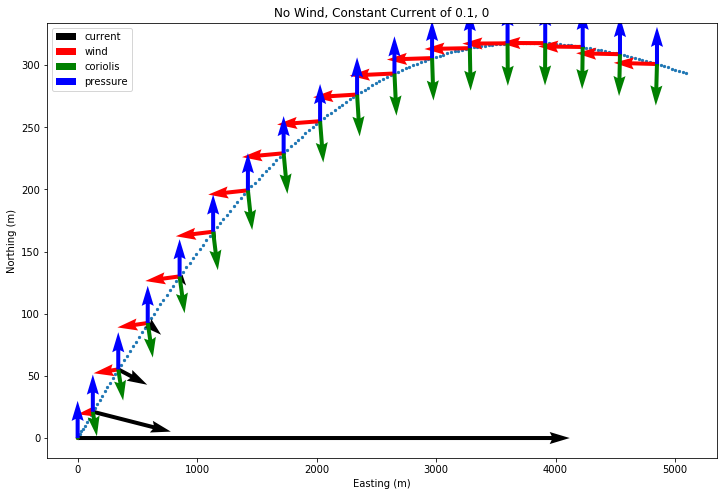

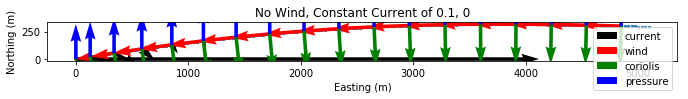

In [16]:
xds = simulator.run_test_simulation(start_location, time_frame, 
                                    constant_current_velocity=(0.1, 0),
                                    constant_wind_velocity=(0, 0),
                                    constant_current_acceleration=(0, 0),
                                    start_velocity=(0, 0),
                                    zero_current_force=False, 
                                    zero_wind_force=False, 
                                    zero_coriolis_force=False, 
                                    zero_pressure_force=False)


plot.plot_iceberg_track(xds['latitude'], xds['longitude'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='No Wind, Constant Current of 0.1, 0', 
                        filename='plots/no_wind_constant_eastward_current', autoscale_figure=False,
                        plot_height=8, plot_width=12)
                        

plot.plot_iceberg_track(xds['northing'], xds['easting'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='No Wind, Constant Current of 0.1, 0', 
                        filename='plots/noauto_no_wind_constant_eastward_current', autoscale_figure=False,
                        plot_height=8, plot_width=12, xlabel='Easting (m)', ylabel='Northing (m)')

plot.plot_iceberg_track(xds['northing'], xds['easting'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='No Wind, Constant Current of 0.1, 0', 
                        filename='plots/auto_no_wind_constant_eastward_current', autoscale_figure=True,
                        xlabel='Easting (m)', ylabel='Northing (m)')

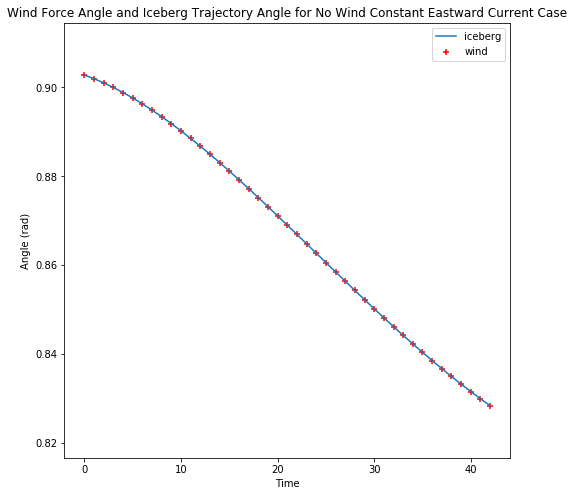

In [50]:
plt.figure(figsize=(8, 8))
wind_force_angle = np.arctan2(xds['wind_northward_force'].values, xds['wind_eastward_force'].values)
iceberg_trajectory_angle = wind_force_angle = np.arctan2(xds['northing'].values, xds['easting'].values)
plt.scatter(range(len(wind_force_angle[10::4]+2)), wind_force_angle[10::4], marker='+', s=40, c='r', label='wind')
#plt.scatter(range(len(iceberg_trajectory_angle[8::4]+2)), iceberg_trajectory_angle[8::4], marker='.')
plt.plot(iceberg_trajectory_angle[10::4], label='iceberg')
#plt.plot(iceberg_trajectory_angle[10:])
plt.ylabel('Angle (rad)')
plt.xlabel('Time')
plt.title('Wind Force Angle and Iceberg Trajectory Angle for No Wind Constant Eastward Current Case')
plt.legend()
plt.show()

## No Current Constant Wind of 10, 10

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:666: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:666: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


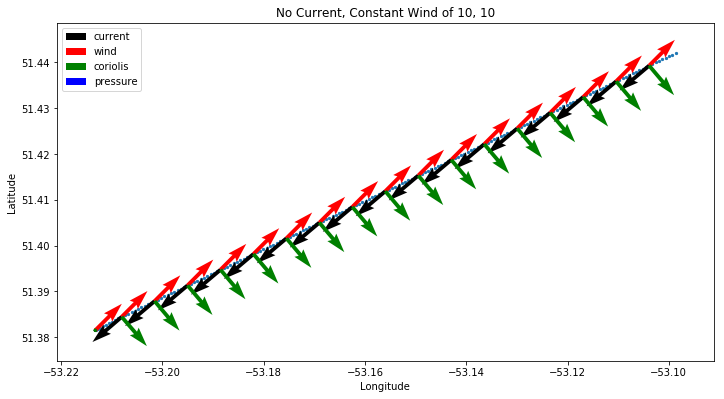

In [5]:
xds = simulator.run_test_simulation(start_location, time_frame, 
                                    constant_current_velocity=(0, 0),
                                    constant_wind_velocity=(10, 10),
                                    constant_current_acceleration=(0, 0),
                                    zero_current_force=False, 
                                    zero_wind_force=False, 
                                    zero_coriolis_force=False, 
                                    zero_pressure_force=False)


plot.plot_iceberg_track(xds['latitude'], xds['longitude'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='No Current, Constant Wind of 10, 10', 
                        filename='plots/no_current_constant_wind', autoscale_figure=True,
                        figure_scale_factor=1.5)
                        #ref_track=(ref_lats, ref_lons))

## No Current Constant Wind of 10, 0

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:666: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:666: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


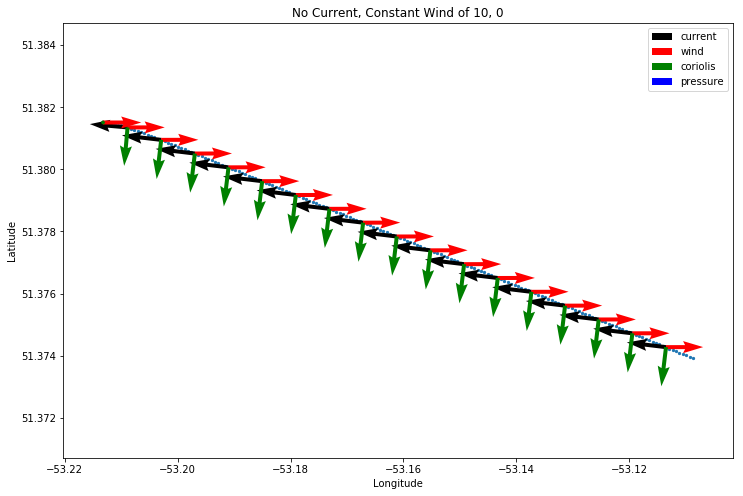

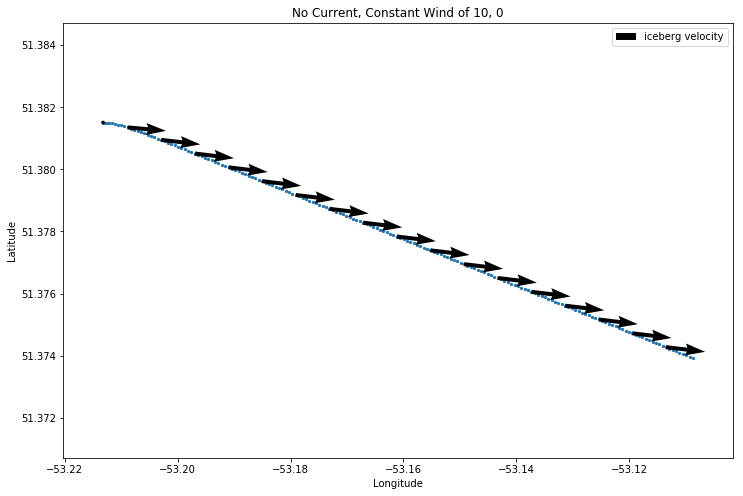

In [6]:
xds = simulator.run_test_simulation(start_location, time_frame, 
                                    constant_current_velocity=(0, 0),
                                    constant_wind_velocity=(10, 0),
                                    constant_current_acceleration=(0, 0),
                                    start_velocity=(0, 0),
                                    zero_current_force=False, 
                                    zero_wind_force=False, 
                                    zero_coriolis_force=False, 
                                    zero_pressure_force=False)


plot.plot_iceberg_track(xds['latitude'], xds['longitude'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='No Current, Constant Wind of 10, 0', 
                        filename='plots/no_current_constant_eastward_wind', autoscale_figure=False,
                        plot_height=8, plot_width=12)
                        
plot.plot_iceberg_track(xds['latitude'], xds['longitude'], 
                        vectors=[
                                 [xds['iceberg_eastward_velocity'], xds['iceberg_northward_velocity']],
                                ], 
                        arrow_colors=['black'], 
                        arrow_labels=['iceberg velocity'],
                        save=True, title='No Current, Constant Wind of 10, 0', 
                        filename='plots/no_current_constant_eastward_wind', autoscale_figure=False,
                        plot_height=8, plot_width=12)

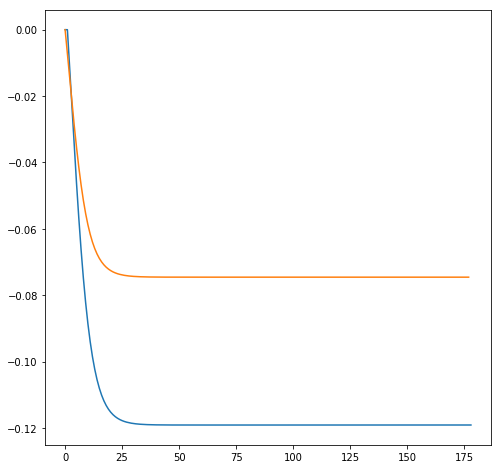

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(np.arctan2(xds['iceberg_northward_velocity'].values, xds['iceberg_eastward_velocity'].values))
plt.plot(np.arctan2(np.diff(xds['latitude'].values), np.diff(xds['longitude'].values)))
plt.show()

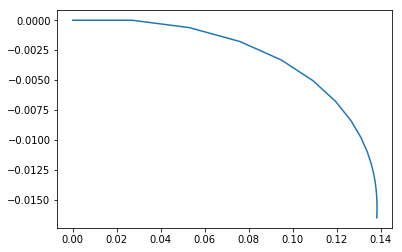

In [8]:
plt.plot(xds['iceberg_eastward_velocity'].values, xds['iceberg_northward_velocity'].values)
plt.show()

In [13]:
for data_var in xds.data_vars:
    print(f'{data_var}: {xds[data_var].values[:4]}')

latitude: [51.38151    51.38151    51.38150834 51.38150354]
longitude: [-53.21323    -53.21311311 -53.21288425 -53.21255616]
iceberg_eastward_velocity: [0.         0.02706934 0.05300338 0.07598061]
iceberg_northward_velocity: [ 0.          0.         -0.00061691 -0.00177905]
current_eastward_velocity: [0. 0. 0. 0.]
current_northward_velocity: [0. 0. 0. 0.]
wind_eastward_velocity: [10. 10. 10. 10.]
wind_northward_velocity: [0. 0. 0. 0.]
current_eastward_force: [      0.          -27038.43472344 -103672.33485899 -213084.02865612]
current_northward_force: [   0.            0.         1206.64069296 4989.25881584]
wind_eastward_force: [740097.28       736095.91478327 732272.54219803 728893.40981057]
wind_northward_force: [  0.           0.          45.41501029 130.66651616]
coriolis_eastward_force: [    0.             0.          -384.38894855 -1108.5112858 ]
coriolis_northward_force: [    -0.         -16866.689713   -33025.98695875 -47342.91390898]
pressure_eastward_force: [0. 0. 0. 0.]
pr

## Do the water drag vectors oppose iceberg velocity vectors?

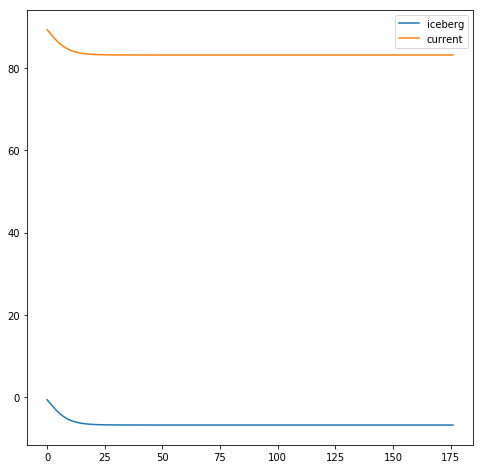

In [16]:
plt.figure(figsize=(8, 8))
iceberg_velocity_angle = np.arctan2(xds['iceberg_northward_velocity'].values, xds['iceberg_eastward_velocity'].values)
current_velocity_angle = np.arctan2(xds['current_northward_force'].values, xds['current_eastward_force'].values)
plt.plot(iceberg_velocity_angle[2:] * 180 / np.pi, label='iceberg')
plt.plot((current_velocity_angle[2:] - np.pi / 2) * 180 / np.pi, label='current')
plt.legend()
plt.show()

$$M_i \frac{d\vec{v}_i}{dt} = \vec{F}_a + \vec{F}_w + \vec{F}_c + \vec{F}_{wp}$$
$$\vec{F}_a = (0.5 \rho_a C_a A_s + \rho_a C_{da} A_t) \vert \vec{v}_a - \vec{v}_i \vert (\vec{v}_a - \vec{v}_i)$$
$$\vec{F}_w = 0.5 \rho_w (C_w \sum_n A_k(n) \vert \vec{v}_w(n) - \vec{v}_i \vert (\vec{v}_w(n) - \vec{v}_i) + C_{dw} A_b \vert \vec{v}_w - \vec{v}_i \vert (\vec{v}_w - \vec{v}_i))$$
$$\vec{F}_w = 0.5 \rho_w (C_w A_k + C_{dw} A_b) \vert \vec{v}_w - \vec{v}_i \vert (\vec{v}_w - \vec{v}_i)$$
$$\vec{F}_c = 2M \Omega sin \phi \vec{k} \times \vec{v}_i$$
$$\vec{F}_{wp} = M(\frac{d\bar{\vec{v}}_{w}}{dt} + f \times \bar{\vec{v}}_{w})$$

**Constants** <br />
$v_{ax} = v_{ax}$ <br /> $v_{ay} = v_{wx} = v_{wy} = F_{wpx} = F_{wpy} = 0$ <br />

**Time step 0** <br />
$v_{x0} = v_{y0} = F_{ay0} = F_{wx0} = F_{wy0} = F_{cx0} = F_{cy0} = a_{y0} = 0$ <br />
$F_{ax0} = C_a v_{ax}^2$ <br />
$a_{x0} = \frac{F_{ax0}}{M}$ <br />

**Time step 1** <br />
$v_{y1} = F_{ay1} = F_{wy1} = F_{cx1} = 0$ <br />
$v_{x1} = a_{x0} \Delta t$ <br />  
$F_{ax1} = -C_a (v_{ax} - v_{x1})^2$ <br />
$F_{wx1} = -C_w v_{x1}^2$ <br />
$F_{cy1} = -f M v_{x1}$ <br />
$a_{x1} = \frac{F_{ax1} + F_{wx1}}{M}$ <br />
$a_{y1} = \frac{F_{cy1}}{M}$ <br />

**Time step 2** <br />
$v_{x2} = v_{x1} + a_{x1} \Delta t$ <br /> 
$v_{y2} = a_{y1} \Delta t$ <br />
$F_{ax2} = C_a (v_{ax} - v_{x2})\sqrt{(v_{ax} - v_{x2})^2 + v_{y2}^2}$ <br />
$F_{ay2} = -C_a v_{y2}\sqrt{(v_{ax} - v_{x2})^2 + v_{y2}^2}$ <br />
$F_{wx2} = -C_w v_{x2}\sqrt{v_{x2}^2 + v_{y2}^2}$ <br />
$F_{wy2} = -C_w v_{y2}\sqrt{v_{x2}^2 + v_{y2}^2}$ <br />
$F_{cx2} = f M v_{y2}$ <br />
$F_{cy2} = -f M v_{x2}$ <br />
$a_{x2} = \frac{F_{ax2} + F_{wx2} + F_{cx2}}{M}$ <br />
$a_{y2} = \frac{F_{ay2} + F_{wy2} + F_{cy2}}{M}$ <br />

**Time step n** <br />
$v_{xn} = (\sum_{i=1}^n v_{xi}) + a_{xn-1} \Delta t$ <br /> 
$v_{yn} = (\sum_{i=2}^n v_{yi}) + a_{yn-1} \Delta t$ <br />
$F_{axn} = C_a (v_{ax} - v_{xn})\sqrt{(v_{ax} - v_{xn})^2 + v_{yn}^2}$ <br />
$F_{ayn} = -C_a v_{yn}\sqrt{(v_{ax} - v_{xn})^2 + v_{yn}^2}$ <br />
$F_{wxn} = -C_w v_{xn}\sqrt{v_{xn}^2 + v_{yn}^2}$ <br />
$F_{wyn} = -C_w v_{yn}\sqrt{v_{xn}^2 + v_{yn}^2}$ <br />
$F_{cxn} = f M v_{yn}$ <br />
$F_{cyn} = -f M v_{xn}$ <br />
$a_{xn} = \frac{F_{axn} + F_{wxn} + F_{cxn}}{M}$ <br />
$a_{yn} = \frac{F_{ayn} + F_{wyn} + F_{cyn}}{M}$ <br />

## Constant Current and Wind of 0.1, 0 and 10, 0

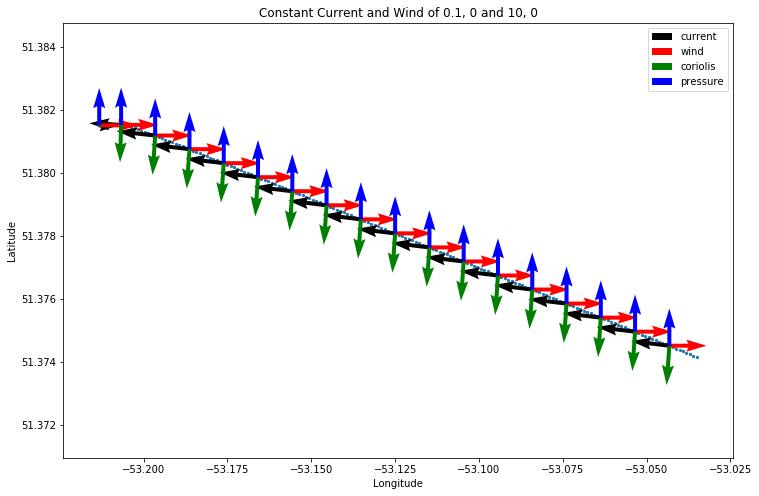

In [17]:
xds = simulator.run_test_simulation(start_location, time_frame, 
                                    constant_current_velocity=(0.1, 0),
                                    constant_wind_velocity=(10, 0),
                                    constant_current_acceleration=(0, 0),
                                    start_velocity=(0, 0),
                                    zero_current_force=False, 
                                    zero_wind_force=False, 
                                    zero_coriolis_force=False, 
                                    zero_pressure_force=False)


plot.plot_iceberg_track(xds['latitude'], xds['longitude'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='Constant Current and Wind of 0.1, 0 and 10, 0', 
                        filename='plots/constant_eastward_current_and_wind', autoscale_figure=False,
                        plot_height=8, plot_width=12)
                        #ref_track=(ref_lats, ref_lons))

## Coriolis Circle

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:666: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:666: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/matplotlib/quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


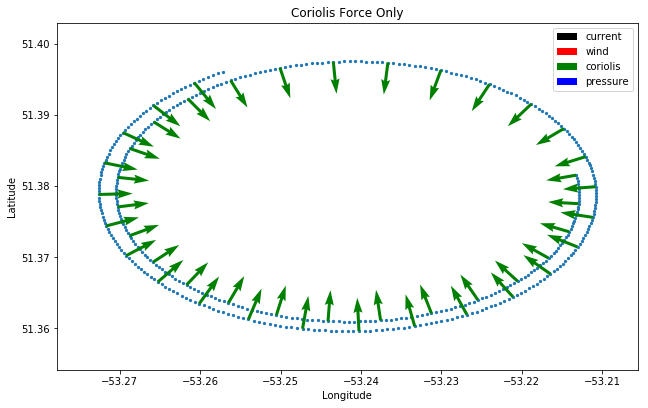

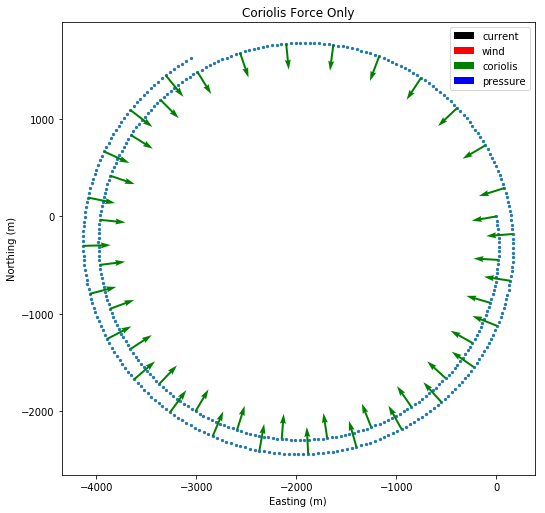

In [11]:
extended_time_frame = (tc.start_time, tc.end_time + np.timedelta64(1, 'D'))
#temp_start_velocty = (np.mean(xds['iceberg_eastward_velocity'].values), 
#                      np.mean(xds['iceberg_northward_velocity'].mean().values))
xds = simulator.run_test_simulation(start_location, extended_time_frame,
                                    constant_current_velocity=(0, 0),
                                    constant_wind_velocity=(0, 0),
                                    constant_current_acceleration=(0, 0),
                                    start_velocity=start_velocity,
                                    zero_current_force=True, 
                                    zero_wind_force=True, 
                                    zero_coriolis_force=False, 
                                    zero_pressure_force=True)


plot.plot_iceberg_track(xds['latitude'], xds['longitude'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='Coriolis Force Only', 
                        filename='plots/coriolis_circle', autoscale_figure=True,
                        figure_scale_factor=1.4)


plot.plot_iceberg_track(xds['northing'], xds['easting'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='Coriolis Force Only', 
                        filename='plots/coriolis_circle', autoscale_figure=True,
                        figure_scale_factor=1.4, xlabel='Easting (m)', ylabel='Northing (m)')
                        #ref_track=(ref_lats, ref_lons))


# Misc Notes

Approximately, for a tabular iceberg:

$$C_a = 5000C_w$$ 

And for this simulation:

$$V_w = 50V_c$$

# Reason for Sign Change in Pressure Force Equations

Assumptions:<br />
<ul>
    <li> Iceberg is in the Northern Hemisphere </li>
    <li> Iceberg is a cuboid </li>
    <li> North-East-Down Coordinate System </li>
    <li> Current velocity is due South </li>
</ul>

**Geostrophic Equations**
$$\frac{du}{dt} = -\frac{1}{\rho_w}\frac{dP}{dx} + f v$$
$$\frac{dP}{dx} = \rho_w (f v - \frac{du}{dt})$$
<br />
Where $u$ and $v$ are the eastward and northward current velocity components, $t$ is time, $\rho_w$ is the density of seawater, $P$ is pressure, $x$ is the easting, and $f$ is the Coriolis parameter.
<br />
<br />
**Pressure Gradient Force**
$$F_P = PLH - (P + \frac{dP}{dx}L)LH$$
$$ = -\frac{dP}{dx}L^2H$$
$$ = -\rho_w L^2 H (f v - \frac{du}{dt})$$
$$ = M(a_x - f v)$$
<br />
Where $F_P$ is the pressure gradient force, $L$ and $H$ are the length and keel height of the iceberg, $M$ is the mass of the water displaced (by Archimedes Principle), and $a_x$ is the eastward acceleration of the ocean current.


# Optimization

In [19]:
keys = ['Ca', 'Cw', 'waterline_length', 'sail_height']
x0 = (1, 1, 160, 60)
bounds = ((0, 15), (0, 15), (120, 200), (45, 75))
reference_vectors = (ref_lats, ref_lons)
optimization_result = simulator.run_optimization(keys, x0, bounds, reference_vectors, start_location, time_frame)

In [20]:
optimization_result

      fun: 0.008268192417377232
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.47434495e-04, 2.11305626e-03, 8.18962953e-07, 0.00000000e+00])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 290
      nit: 12
   status: 2
  success: False
        x: array([  0.        ,  11.33278229, 159.75284486,  60.00090841])